In [99]:
import sys
sys.path.append('./code')
sys.path.append('C:/Users/Brendon/Documents/PythonScripts/Jupyter/Research/Statistics/code')

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statfunctions
sns.set_style('white')
sns.set_context('poster')
import simulations
from time import time

In [80]:
simulations.IntegrateSchrodingerEquation.parameter_sweep

Here is an example of performing a parameter sweep while integrating the schrodinger equation. The parameter sweep performs this operation via parallel processing by default.

0.523999929428
0.381075373438
2.95179714995


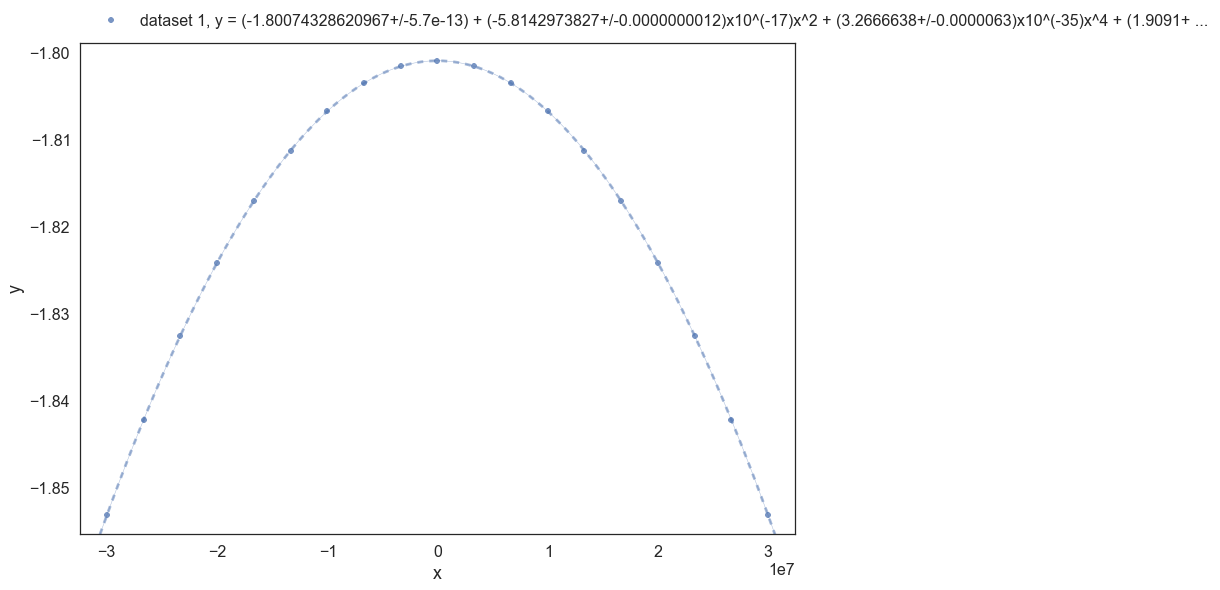

In [262]:
#reload(simulations)

gaussian = lambda t, t0, dt: np.exp(-(t - t0)**2/(2 * dt**2))

Gamma = 1 / (500 * 10**(-9))
Delta = 0#2 * np.pi * 10**(6)

T = .1/Gamma#30*10**(-6)
N = 100

t = np.linspace(-T, T, N)
Omega = (10) * 2 * np.pi * (1 * 10**6)
width = T/6
omega0 = gaussian(t, width, width) * Omega
omega1 = gaussian(t, -width, width) * Omega

delta = np.linspace(-15, 15, 19) * Gamma
energy = lambda delta: {'X': -delta, 
                        'C': Delta - 1j*Gamma/2,
                        'H': delta}

t0 = time()
ISE = simulations.IntegrateSchrodingerEquation.parameter_sweep(
            delta,
            t=t,
            energy=energy,
            omega ={('X','C'): omega0,
                    ('C','H'): omega1},
            psi0 = {'X':1, 'C':0, 'H':0},
            final_state=True,
            parallelize=False
      )
t1 = time()

print (t1 - t0)

final_state = np.array([0,0,1])
ISE = np.array(ISE)
P = np.log10(np.abs(np.dot(ISE,final_state))**2)
regr = statfunctions.PolynomialFit1D(delta, P, orders=[0, 2, 4, 6, 8], renormalize_error=True)
print 2 * (1/np.sqrt(-2*regr.coefficients[1]))/(Omega/np.sqrt(Gamma * width))
print 2 * (1/np.sqrt(-2*regr.coefficients[1]))/(Omega)
regr.plot()

In [213]:
from types import FunctionType
from simulations import IntegrateSchrodingerEquation
import inspect
import copy

class ParameterSweep(object):
    
    def __init__(self, values, parameter_names=None, output=None, parameter_units=None, **kwargs):
        """
        values_dict is a dictionary of parameters to be varied of the form:
        
        values_dict = {'parameter_1':[0, 1, 2, 4],
                       'parameter_2':[.1, .2, .3, ...]}
                       
        output designates what to do with the output.
        """
        
        self.values = values
        
        if parameter_names is None:
            parameter_names = {k:k for k in values.keys()}
            
        if parameter_units is None:
            parameter_units = {k:None for k in values.keys()}
            
        for k in values.keys():
            if k not in parameter_names.keys():
                parameter_names[k] = k
            if k not in parameter_units.keys():
                parameter_units[k] = None
                
        self.parameter_names = parameter_names
        self.parameter_units = parameter_units
        
        self._expand_values()
        
        if isinstance(output, list):
            new_output = copy.deepcopy(output)
            output = lambda results: np.abs(np.dot(np.array(results), np.array(new_output)))**2
            kwargs['final_state'] = True
            
        if output == 'norm':
            output = lambda results: np.array([result.norm() for result in results])
        
        self.output = output
        
        for k, v0 in kwargs.items():
            if isinstance(v0, FunctionType):
                v = copy.deepcopy(v0)
                kwargs[k] = lambda args: v(**{key: arg for key, arg in zip(self.values.keys(), args)
                                                              if key in inspect.getargspec(v).args})
    
                
        self.results = IntegrateSchrodingerEquation.parameter_sweep(self.expanded_values, **kwargs)
        
        if self.output is not None:
            self.output_results = self.output(self.results)
        
    def _expand_values(self):
        
        self.expanded_values = [[]]
            
        for k in self.values.keys():
            new_expanded_values =[]
            for v in self.expanded_values:
                for item in self.values[k]:
                    new_expanded_values.append(v + [item])
            self.expanded_values = new_expanded_values
            
        return
    
    def plot(*args, **kwargs):
        """
        the args are the names of parameters to plot with respect to.
        """
        other_parameters = self.values.keys()
        if len(args)==0:
            x_ind = 0
        else:
            x_ind = other_parameters.index(args[0])
        
        x_param = other_parameters.pop(x_ind)
        

0.638000011444


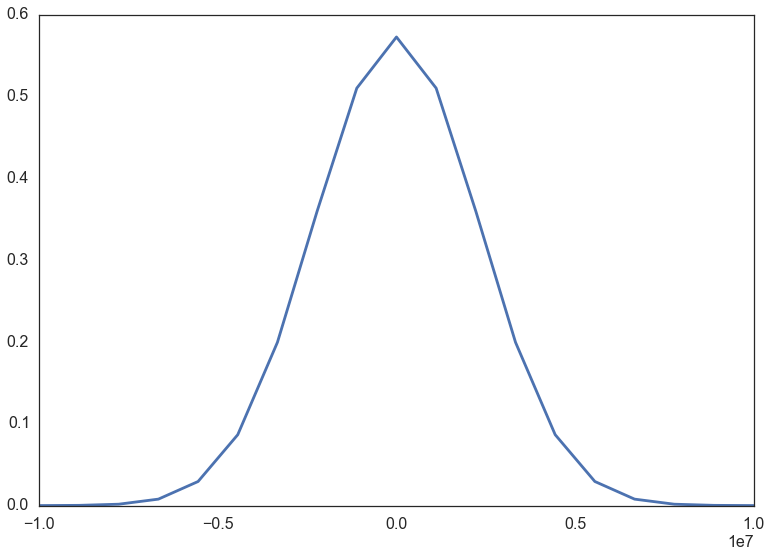

In [211]:
#reload(simulations)

gaussian = lambda t, t0, dt: np.exp(-(t - t0)**2/(2 * dt**2))

Gamma = 1 / (500 * 10**(-9))
Delta = 0

T = 4/Gamma#30*10**(-6)
N = 100

t = np.linspace(-T, T, N)
omega0 = gaussian(t, +T/6, T/6) * 2 * np.pi * (1 * 10**6)
omega1 = gaussian(t, -T/6, T/6) * 2 * np.pi * (1 * 10**6)

delta = np.linspace(-5, 5, 19) * Gamma
energy = lambda delta=0: {'X': -delta, 
                          'C': Delta - 1j*Gamma/2,
                          'H': delta}

t0 = time()
ISE = ParameterSweep(
            {'delta': delta},
            t=t,
            energy=energy,
            omega ={('X','C'): omega0,
                    ('C','H'): omega1},
            psi0 = {'X':1, 'C':0, 'H':0},
            final_state=True,
            parallelize=False,
            output=[0,0,1]
      )
t1 = time()

print (t1 - t0)
plt.plot(delta, ISE.output_results)

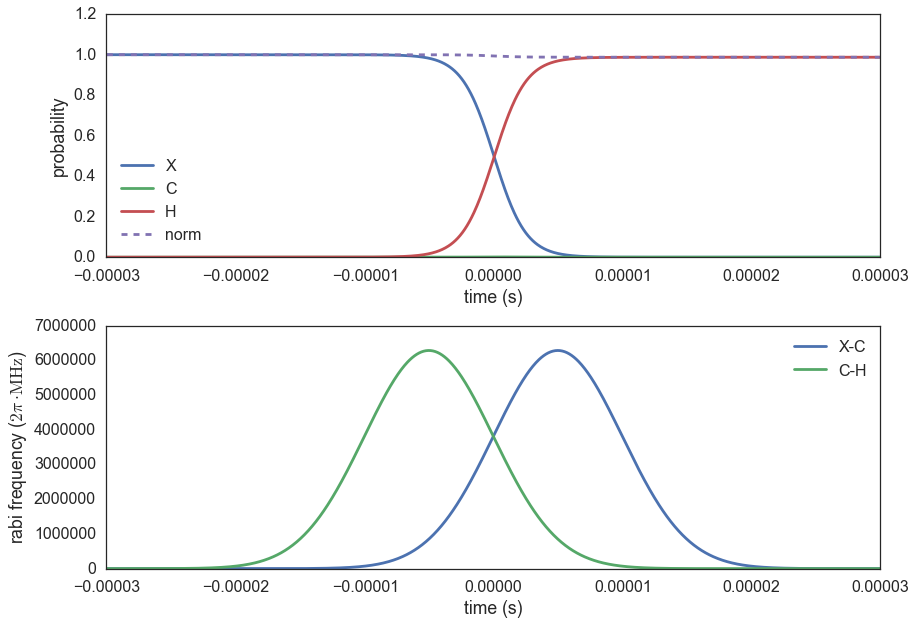

In [15]:
gaussian = lambda t, t0, dt: np.exp(-(t - t0)**2/(2 * dt**2))

T = 30*10**(-6)
N = 1000

t = np.linspace(-T, T, N)
omega0 = gaussian(t, +T/6, T/6) * 2 * np.pi * (1 * 10**6)
omega1 = gaussian(t, -T/6, T/6) * 2 * np.pi * (1 * 10**6)
Gamma = 1 / (500 * 10**(-9))
Delta = 0
delta = 0

ISE = simulations.IntegrateSchrodingerEquation(t=t,
                                   energy={'X': -delta, 
                                           'C': Delta - 1j*Gamma/2,
                                           'H': delta},
                                   omega ={('X','C'): omega0,
                                           ('C','H'): omega1},
                                   psi0 = {'X':1, 'C':0, 'H':0})

plt.subplot(2,1,1)
ISE.plot()
plt.subplot(2,1,2)
ISE.plot_omega()
plt.tight_layout()

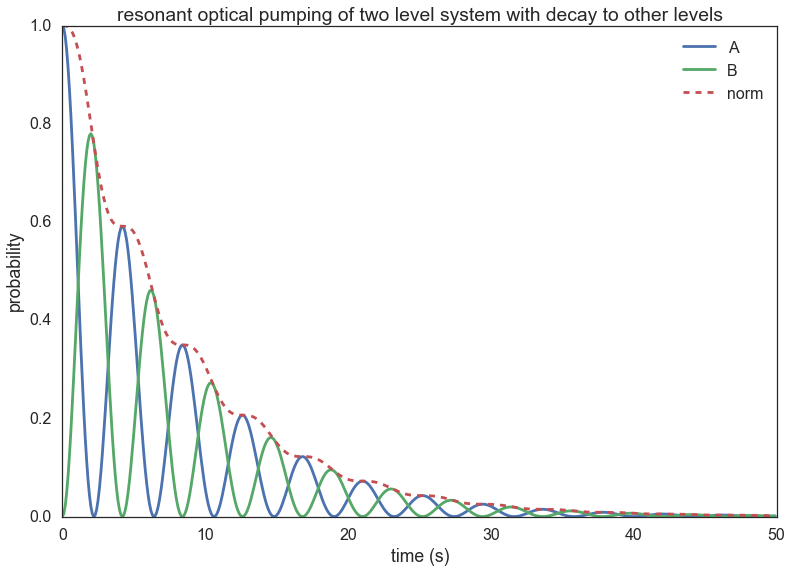

In [20]:
ISE = simulations.IntegrateSchrodingerEquation(dt=.1*np.ones(500),
                                               energy={'A':0, 'B':-1j/8.0},
                                               omega= {('A','B'): .75},
                                               psi0=  {'A':1, 'B':0})

ISE.plot()
_ = plt.title('resonant optical pumping of two level system with decay to other levels')

In [50]:
from types import FunctionType

class MasterEquationIntegration(object):
    
    def __init__(self, t=None, dt=None, n_iter=None,
                 hamiltonian=None,
                 energy=None, omega=None, gamma=None, 
                 names=None, initial_state=None):
        
        self._resolve_time_arrays(t, dt, n_iter) # find number of iterations and normalize t and dt inputs
        
        self.hamiltonian = self._create_hamiltonian(hamiltonian, energy, omega, names)
        
        
    def _resolve_time_arrays(self, t, dt, n_iter):
        """
        normalizes the dt and t arrays given different input methods
        """
        if dt is None:
            # case where array t is entered
            if t is None:
                raise IOError('you must input either dt or t')
            self.dt = (t[1:] - t[:-1])
            self.t  = (t[1:] + t[:-1])/2
            self.n_iter = len(self.dt)
        else:
            try:
                # case where array dt is entered
                self.n_iter = len(dt)
                self.dt = dt
            except:
                # case where scalar dt, and n_iter are entered
                self.n_iter = n_iter
                self.dt = np.ones(n_iter) * dt
                
            self.t = np.cumsum(self.dt) - self.dt[0]
        return
    
    def _create_hamiltonian(self, hamiltonian, energy, omega, names):
        
        if hamiltonian is not None:
            self.names = names
            if isinstance(hamiltonian, FunctionType):
                # case where I input a hamiltonian function
                self.n_states = hamiltonian(0).shape[0]
                return hamiltonian
            else:
                if len(hamiltonian) == self.n_iter:
                    # case where i input a list of hamiltonians
                    self.n_states = hamiltonian[0].shape[0]
                    return lambda i: hamiltonian[i]
                else:
                    # case where i input a constant hamiltonian
                    self.n_states = hamiltonian.shape[0]
                    return lambda i: hamiltonian
        else:
            def regularize_length(lists):
                new_lists = []
                for l in lists:
                    try:
                        if len(l) == self.n_iter:
                            new_lists.append(np.array(l, dtype='complex128'))
                        elif len(l) > self.n_iter:
                            l = np.array(l, dtype='complex128')
                            new_lists.append((l[1:] + l[:-1])/2)
                        else:
                            raise IOError('invalid array length')
                    except:
                        new_lists.append(np.array([l] * self.n_iter, dtype='complex128'))
                return np.array(new_lists, dtype='complex128')
            
            
            if energy is None:
                raise IOError('must input energies')
            if isinstance(energy, dict):
                if names is not None:
                    self.names = names
                else:
                    self.names = energy.keys()
                energy = energy.values()
            else:
                if names is not None:
                    self.names = names
                else:
                    self.names = list(range(len(energy)))
                
            if not(isinstance(omega, dict)):
                raise IOError('omega must be input in the form of a dict')
            else:
                omega = {(self.names.index(key[0]), self.names.index(key[1])): regularize_length([value])[0]
                         for key, value in omega.items()}
                
            energy = regularize_length(energy)
            
            def hamiltonian(i):
                H = np.diag(energy[i,:])

                om = [w[i] for w in omega.values()]
                for w, inds in zip(om, omega.keys()):
                    H[inds[0], inds[1]] = w
                    H[inds[1], inds[0]] = np.conj(w)

                return H
            
            return hamiltonian
            

In [51]:
gaussian = lambda t, t0, dt: np.exp(-(t - t0)**2/(2 * dt**2))

T = 30*10**(-6)
N = 1000

t = np.linspace(-T, T, N)
omega0 = gaussian(t, +T/6, T/6) * 2 * np.pi * (1 * 10**6)
omega1 = gaussian(t, -T/6, T/6) * 2 * np.pi * (1 * 10**6)
Gamma = 1 / (500 * 10**(-9))
Delta = 0
delta = 0

ISE = MasterEquationIntegration(t=t,
                                   energy={'X': -delta, 
                                           'C': Delta - 1j*Gamma/2,
                                           'H': delta},
                                   omega ={('X','C'): omega0,
                                           ('C','H'): omega1},
                                   initial_state = {'X':1, 'C':0, 'H':0})

In [53]:
ISE.hamiltonian(0)

999

In [55]:
f = lambda a, b, c, d: -((1.48329*a*b*d)/(-1.7376*c + 0.602424*a*b*d + 0.8688*c*d))

In [73]:
def evaluate_error(function, params, N=10000):
    outcomes = []
    for n in range(N):
        args = []
        for param in params:
            args.append(np.random.normal()*param[1] + param[0])
        outcomes.append(function(*args))
    return np.mean(outcomes), np.std(outcomes)

In [74]:
np.random.normal()

-0.10089794376051195

In [79]:
evaluate_error(f,((.33,.05),
                  (.6, .1),
                  (.92,.05),
                  (.7, .04)))

(0.21639342744380255, 0.059253896648643285)

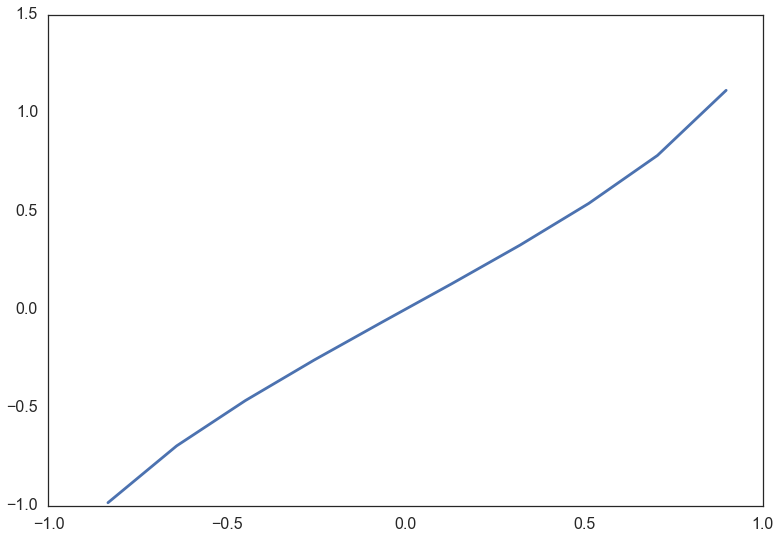

In [284]:
x = np.linspace(-np.pi,2 * np.pi)
y = np.arcsin(x)
plt.plot(x,y)

In [283]:
n

1.5707963267948966

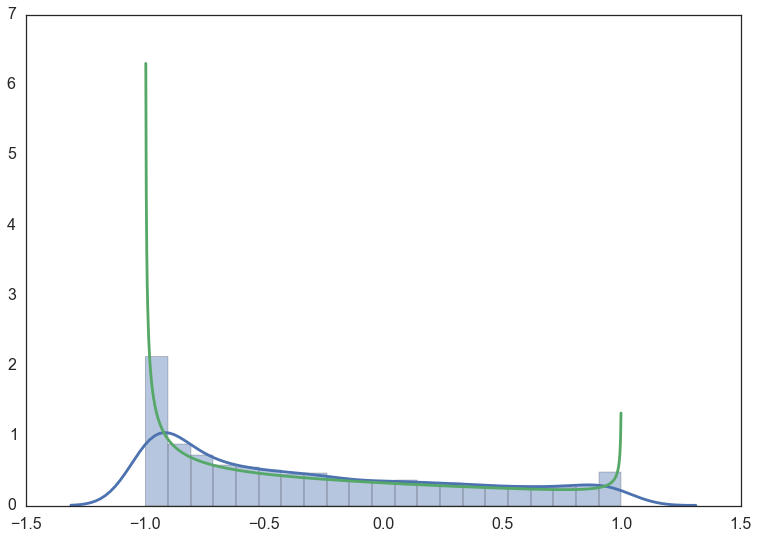

In [300]:
width = 1
offset = -.5
x = width * np.random.normal(size=(10000,)) + offset
y = np.sin(x)
sns.distplot(y)

x2 = np.linspace(-5*width,+5*width,400)
Px = lambda X: (1/(np.sqrt(2)*width)) * np.exp(-(X - offset)**2/(2*width**2))
Py = lambda Y, l=10: np.sum([(Px(np.arcsin(Y) + 2 * np.pi * n) + Px(np.pi - np.arcsin(Y) + 2 * np.pi * n))/np.sqrt(1 - Y**2)
                       for n in range(-int(l*width),int(l*width))])
y2 = np.linspace(-1, 1, 1000)
py2 = np.array([Py(Y) for Y in y2])
plt.plot(y2,py2/2)

In [354]:
def roll_game(thresh=3.5):
    counter = 1
    rolls = 3
    if not(isinstance(thresh, list)):
        thresh = [thresh] * rolls
        
    while counter <= rolls:
        roll = np.random.randint(1,7)
        if roll > thresh[counter - 1]:
            return roll
        counter += 1
    return roll

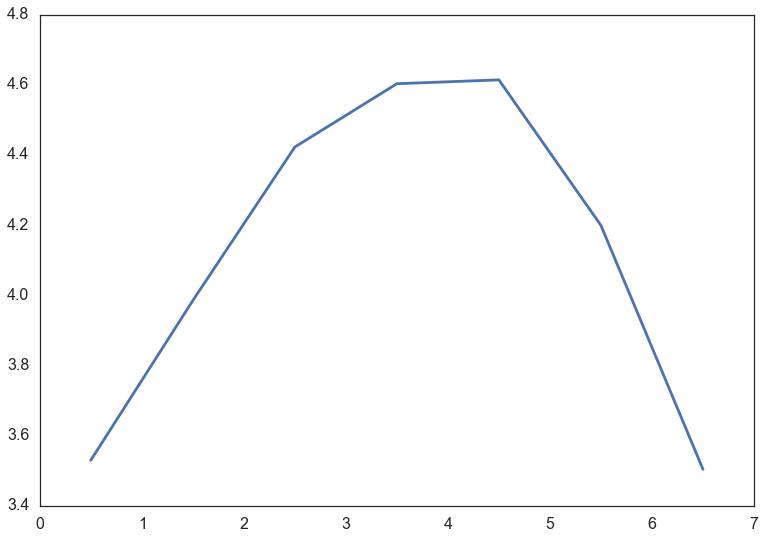

In [358]:
thresh = np.array(range(0,7)) + .5
rolls = np.array([np.mean(np.array([roll_game(thresh=t) for n in range(5000)])) for t in thresh])
plt.plot(thresh, rolls)

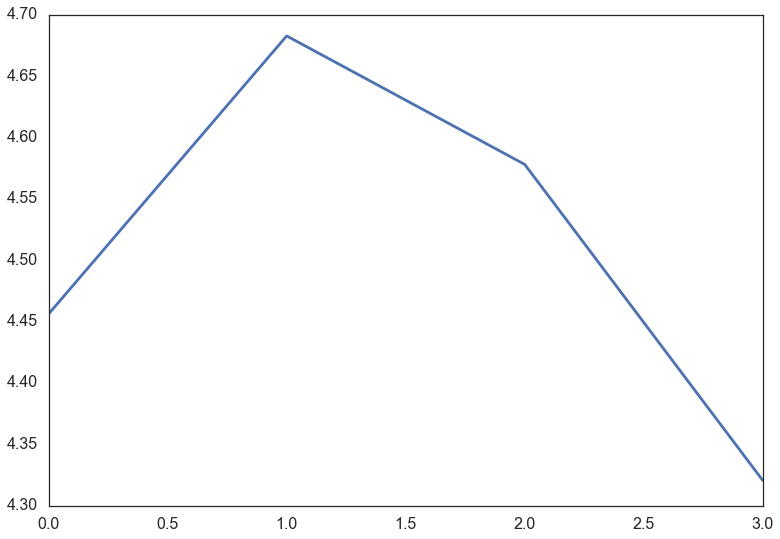

In [359]:
threshs = [list(np.array(range(i,i-3,-1))+.5) for i in range(5,1,-1)]
rolls = np.array([np.mean(np.array([roll_game(thresh=t) for n in range(10000)])) for t in threshs])
plt.plot(range(len(threshs)), rolls)

In [349]:
[np.array(range(i,i-3,-1))+.5 for i in range(5,1,-1)]

[array([ 5.5,  4.5,  3.5]),
 array([ 4.5,  3.5,  2.5]),
 array([ 3.5,  2.5,  1.5]),
 array([ 2.5,  1.5,  0.5])]

In [365]:
def expectation_value_number_of_rolls(n):
    
    for i in range(n):
        if i == 0:
            expectation = 3.5
        else:
            thresh = np.floor(previous_expectation + 1)
            if thresh > 6:
                thresh = 6
            expectation = (((6 + thresh)/2) *(float(6 - thresh + 1)/6.0) + 
                          previous_expectation * (6 - float(6 - thresh + 1))/6.0)
            
        previous_expectation = expectation
    return expectation

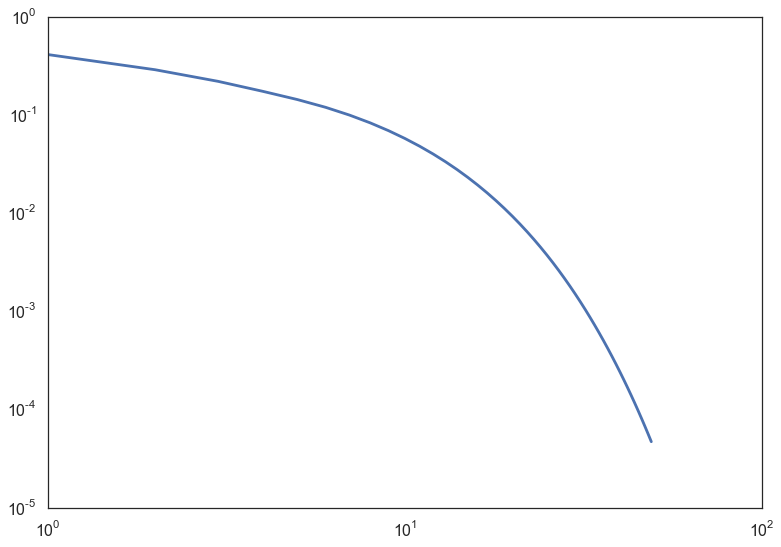

In [373]:
rolls = range(1,50)
expct = np.array([expectation_value_number_of_rolls(i) for i in rolls])
plt.plot(rolls, (6 - expct)/6)
plt.xscale('log')
plt.yscale('log')

In [363]:
range(1,6)

[1, 2, 3, 4, 5]